# MSBD566 - Lecture 4
## Exploratory Data Analysis Example: Measles

We will use a recent measles number in the United States recorded by World Health Organization in `Measles_USA.csv`. The data were compiled from two pages listed in Data Source section. 

## Data definitions
* `Reported_case`: Confirmed measles reported cases, including those confirmed clinically, epidemiologically-linked or by laboratory investigation, EXCEPT for countries that have eliminated measles. For countries that HAVE eliminated measles, cases confirmed clinically should not be included in the sum of total cases. Cases that have been discarded following laboratory investigation should not be included. All WHO recommended case definitions for measles can be found here.

* `Incident_rate`: The reported cases for every 1,000,000 total population

* *Official Coverage definition:* 
    * MCV1: The percentage in the target population who have received one dose of measles-containing vaccine in a given year.
    * MCV2: The percentage in the target population who have received two doses of measles-containing vaccine in a given year.

*Official coverage*:	Official estimates may be based on data from the administrative method, from surveys, or from other sources. Immunization coverage figures from administrative system or from surveys can be biased or inaccurate. Hence, national authorities have the opportunity to provide estimates of what they consider the most likely coverage. This will help to interpret the administrative data.

* *WUENIC definition*	
    * MCV1: Percentage of surviving infants who received the 1st dose of measles containing vaccine. In countries where the national schedule recommends the 1st dose of MCV at 12 months or later based on the epidemiology of disease in the country, coverage estimates reflect the percentage of children who received the 1st dose of MCV as recommended.
    * MCV2: Percentage of children who received the 2nd dose of measles containing vaccine according to the nationally recommended schedule.

## Data Source 
1. https://immunizationdata.who.int/global/wiise-detail-page/measles-reported-cases-and-incidence
2. https://immunizationdata.who.int/global/wiise-detail-page/measles-vaccination-coverage


Key methods we are learning in this notebook:
* Time-series Data Processing
* ~~Web-scraping~~
* ~~Regular expression (RegEx) using `re` module.~~



In [31]:
# load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data cleaning

In [32]:
# load data
data = pd.read_csv('/Users/sravanphanikumarkopparthi/Documents/PHD/MSDB-566/Code/MSBD566-sampleRepo/measles_USA.csv')
cleaned_data = data.copy()
display(data.head())

## Data cleaning
# change reported_cases to numeric
cleaned_data['Reported_cases'] = pd.to_numeric(cleaned_data['Reported_cases'], errors='coerce')

# change year to datetime
cleaned_data['Year'] = pd.to_datetime(cleaned_data['Year'], format='%Y')

# display first few rows of cleaned data
print("\n\nCleaned Data:")
display(cleaned_data.head())

,Year,Incident_rate,Reported_cases,MCV1_WUENIC,MCV1_OFFICIAL,MCV2_WUENIC,MCV2_OFFICIAL
0,2024,0.0,0,92,NaN,95,NaN
1,2023,0.4,121,92,0.0,95,0.0
2,2022,0.0,0,92,91.6,95,0.0
3,2021,0.0,14,92,91.6,95,0.0
4,2020,3.8,1275,91,90.7,95,0.0




Cleaned Data:


,Year,Incident_rate,Reported_cases,MCV1_WUENIC,MCV1_OFFICIAL,MCV2_WUENIC,MCV2_OFFICIAL
0,2024-01-01,0.0,0,92,NaN,95,NaN
1,2023-01-01,0.4,121,92,0.0,95,0.0
2,2022-01-01,0.0,0,92,91.6,95,0.0
3,2021-01-01,0.0,14,92,91.6,95,0.0
4,2020-01-01,3.8,1275,91,90.7,95,0.0


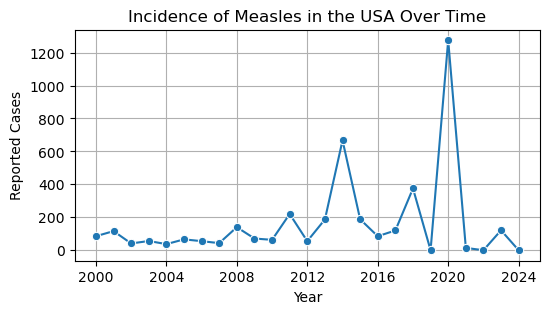

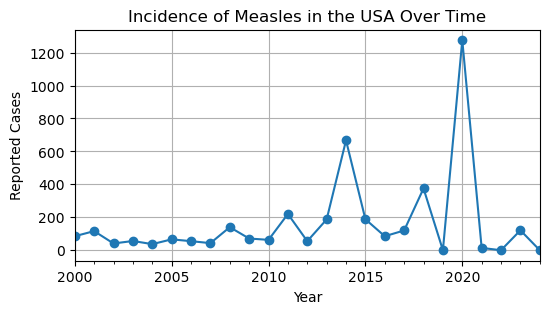

In [33]:
# plot the incidence of measles over time
plt.figure(figsize=(6, 3))
sns.lineplot(data=cleaned_data, x='Year', y='Reported_cases', marker='o')
plt.title('Incidence of Measles in the USA Over Time')
plt.xlabel('Year')
plt.ylabel('Reported Cases')
plt.grid(True)
plt.show()

# plot using pandas built-in plotting
cleaned_data.set_index('Year')['Reported_cases'].plot(figsize=(6, 3), marker='o', title='Incidence of Measles in the USA Over Time')
plt.xlabel('Year')
plt.ylabel('Reported Cases')
plt.grid(True)
plt.show()

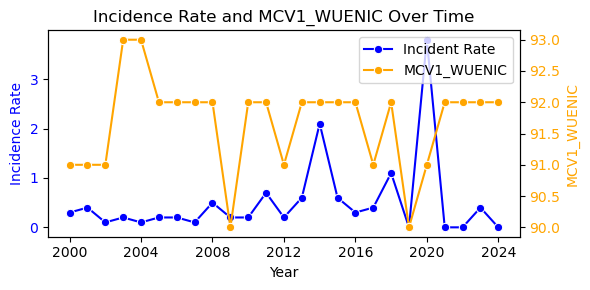

In [34]:
## Plot incidence rate and vaccination MCV1_WUENIC rate over time

# First y-axis for incidence rate
fig, ax1 = plt.subplots(figsize=(6, 3))
sns.lineplot(data=cleaned_data, x='Year', y='Incident_rate', marker='o', ax=ax1, color='blue', label='Incident Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Incidence Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis for MCV1_WUENIC
ax2 = ax1.twinx()
sns.lineplot(data=cleaned_data, x='Year', y='MCV1_WUENIC', marker='o', ax=ax2, color='orange', label='MCV1_WUENIC')
ax2.set_ylabel('MCV1_WUENIC', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

## Adjusting legends - this is an issue on twin axes
# Get handles and labels from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
# Remove current legends
ax1.legend_.remove()
ax2.legend_.remove()
# Add combined legend
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', bbox_to_anchor=(1, 1))

# Finally adjust the layout and show the plot
plt.title('Incidence Rate and MCV1_WUENIC Over Time')
fig.tight_layout()
plt.show()

### Some advanced plotting

We can:
* change x-ticks
* draw vertical lines to mark years

/var/folders/q0/33zn28r13yg22lf2t7vpv50c0000gn/T/ipykernel_73345/837742620.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ax1.set_xticks(pd.date_range(start=cleaned_data['Year'].min(), end=cleaned_data['Year'].max(), freq='4Y'))


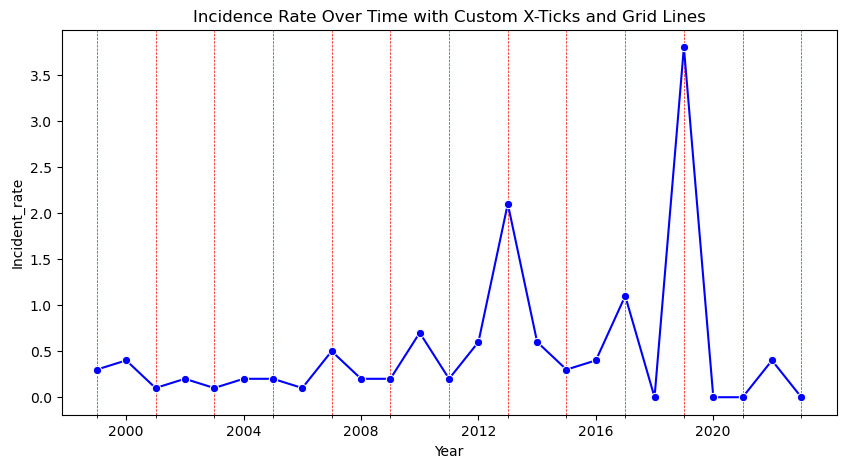

In [35]:
# change x-ticks to show every 5 years and draw vertical red grid lines every 2 years
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.lineplot(data=cleaned_data, x='Year', y='Incident_rate', marker='o', ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_xticks(pd.date_range(start=cleaned_data['Year'].min(), end=cleaned_data['Year'].max(), freq='4Y'))
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
ax1.xaxis.set_minor_locator(plt.matplotlib.dates.YearLocator(2))
ax1.grid(which='minor', color='red', linestyle='--', linewidth=0.5)
plt.title('Incidence Rate Over Time with Custom X-Ticks and Grid Lines')
plt.show()


## Moving Average

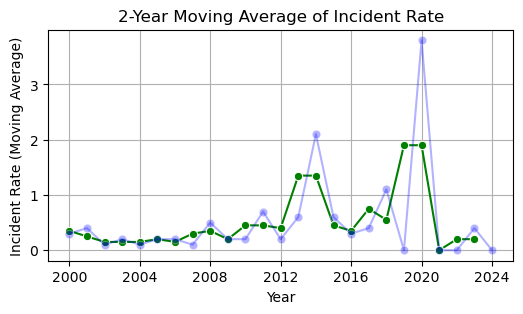

In [36]:
# Calculate and plot 2-year moving average for Incident_rate
n_window = 2
cleaned_data['Incident_rate_MA'] = cleaned_data['Incident_rate'].rolling(window=n_window).mean()

plt.figure(figsize=(6, 3))
sns.lineplot(data=cleaned_data, x='Year', y='Incident_rate_MA', marker='o', color='green')
sns.lineplot(data=cleaned_data, x='Year', y='Incident_rate', marker='o', color='blue', alpha=0.3)
plt.title(f'{n_window}-Year Moving Average of Incident Rate')
plt.xlabel('Year')
plt.ylabel('Incident Rate (Moving Average)')
plt.grid(True)
plt.show()

## Bollinger Bands

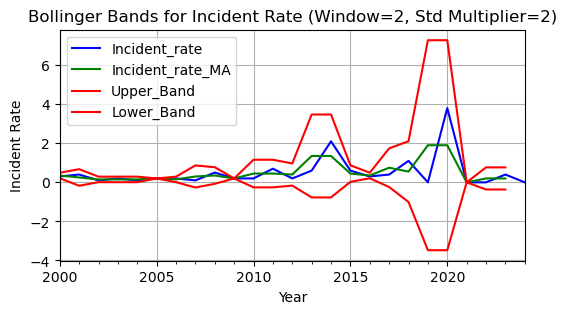

In [37]:
# Bollinger Bands for Incident_rate
n_window = 2
std_multiplier = 2
cleaned_data['Incident_rate_MA'] = cleaned_data['Incident_rate'].rolling(window=n_window).mean()
cleaned_data['Incident_rate_STD'] = cleaned_data['Incident_rate'].rolling(window=n_window).std()
cleaned_data['Upper_Band'] = cleaned_data['Incident_rate_MA'] + (std_multiplier * cleaned_data['Incident_rate_STD'])
cleaned_data['Lower_Band'] = cleaned_data['Incident_rate_MA'] - (std_multiplier * cleaned_data['Incident_rate_STD'])
cleaned_data.set_index('Year')[['Incident_rate', 'Incident_rate_MA', 'Upper_Band', 'Lower_Band']].plot(figsize=(6, 3), color=['blue', 'green', 'red', 'red'])
plt.title(f'Bollinger Bands for Incident Rate (Window={n_window}, Std Multiplier={std_multiplier})')
plt.xlabel('Year')
plt.ylabel('Incident Rate')
plt.grid(True)
plt.show()  

## Date time attributes

In [38]:
Years = cleaned_data['Year']
Years

year = cleaned_data['Year'].dt.year
month = cleaned_data['Year'].dt.month
day = cleaned_data['Year'].dt.day

combinedDates = [year, month, day]
print(combinedDates)

[0     2024
1     2023
2     2022
3     2021
4     2020
5     2019
6     2018
7     2017
8     2016
9     2015
10    2014
11    2013
12    2012
13    2011
14    2010
15    2009
16    2008
17    2007
18    2006
19    2005
20    2004
21    2003
22    2002
23    2001
24    2000
Name: Year, dtype: int32, 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
Name: Year, dtype: int32, 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
Name: Year, dtype: int32]


## Activity: Plotting Time Series Data

1. Plot the similar moving averages and Bollinger Bands in the same plots for each vaccination rate of MCV1 WUENIC and MCV2 WUENIC.
2. Compare with the incident rate. Is there any connection between the vaccinations and the incident rate?
3. Plot the moving averages and Bollinger Bands using moving average of 3 years and 4 years. Does it make a difference in terms of the pattern?

1. Plot the similar moving averages and Bollinger Bands in the same plots for each vaccination rate of MCV1 WUENIC and MCV2 WUENIC.

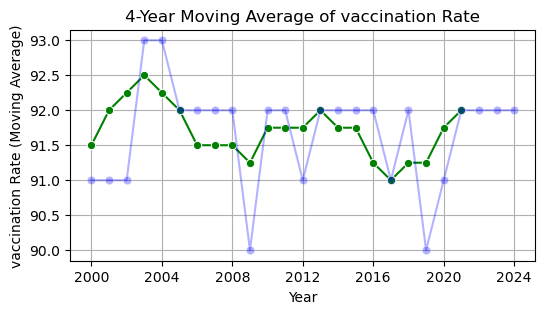

In [39]:
# Calculate and plot 2-year moving average for MCV1 vaccination 
n_window = 4
cleaned_data['MCV1_WUENIC_MA'] = cleaned_data['MCV1_WUENIC'].rolling(window=n_window).mean()

plt.figure(figsize=(6, 3))
sns.lineplot(data=cleaned_data, x='Year', y='MCV1_WUENIC_MA', marker='o', color='green')
sns.lineplot(data=cleaned_data, x='Year', y='MCV1_WUENIC', marker='o', color='blue', alpha=0.3)
plt.title(f'{n_window}-Year Moving Average of vaccination Rate')
plt.xlabel('Year')
plt.ylabel('vaccination Rate (Moving Average)')
plt.grid(True)
plt.show()

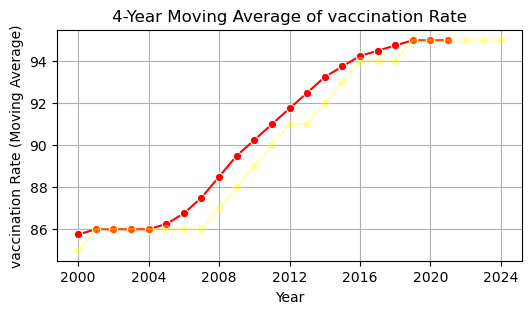

In [40]:
# Calculate and plot 2-year moving average for vaccination 
n_window = 4

cleaned_data['MCV2_WUENIC_MA'] = cleaned_data['MCV2_WUENIC'].rolling(window=n_window).mean()

plt.figure(figsize=(6, 3))
sns.lineplot(data=cleaned_data, x='Year', y='MCV2_WUENIC_MA', marker='o', color='red')
sns.lineplot(data=cleaned_data, x='Year', y='MCV2_WUENIC', marker='o', color='yellow', alpha=0.3)
plt.title(f'{n_window}-Year Moving Average of vaccination Rate')
plt.xlabel('Year')
plt.ylabel('vaccination Rate (Moving Average)')
plt.grid(True)
plt.show()

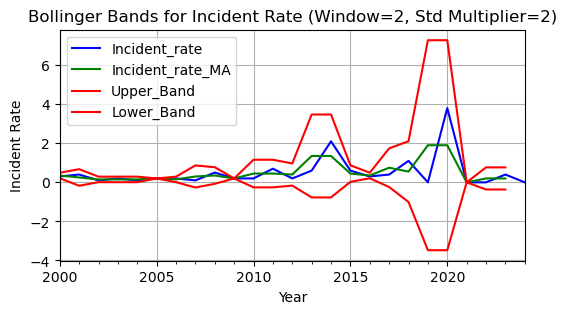

In [41]:
# Bollinger Bands for Incident_rate
n_window = 2
std_multiplier = 2
cleaned_data['Incident_rate_MA'] = cleaned_data['Incident_rate'].rolling(window=n_window).mean()
cleaned_data['Incident_rate_STD'] = cleaned_data['Incident_rate'].rolling(window=n_window).std()
cleaned_data['Upper_Band'] = cleaned_data['Incident_rate_MA'] + (std_multiplier * cleaned_data['Incident_rate_STD'])
cleaned_data['Lower_Band'] = cleaned_data['Incident_rate_MA'] - (std_multiplier * cleaned_data['Incident_rate_STD'])
cleaned_data.set_index('Year')[['Incident_rate', 'Incident_rate_MA', 'Upper_Band', 'Lower_Band']].plot(figsize=(6, 3), color=['blue', 'green', 'red', 'red'])
plt.title(f'Bollinger Bands for Incident Rate (Window={n_window}, Std Multiplier={std_multiplier})')
plt.xlabel('Year')
plt.ylabel('Incident Rate')
plt.grid(True)
plt.show()  

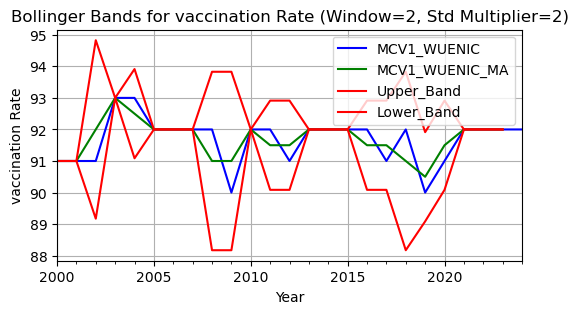

In [28]:
# Bollinger Bands for vaccination
n_window = 2
std_multiplier = 2
cleaned_data['MCV1_WUENIC_MA'] = cleaned_data['MCV1_WUENIC'].rolling(window=n_window).mean()
cleaned_data['MCV1_WUENIC_STD'] = cleaned_data['MCV1_WUENIC'].rolling(window=n_window).std()
cleaned_data['Upper_Band'] = cleaned_data['MCV1_WUENIC_MA'] + (std_multiplier * cleaned_data['MCV1_WUENIC_STD'])
cleaned_data['Lower_Band'] = cleaned_data['MCV1_WUENIC_MA'] - (std_multiplier * cleaned_data['MCV1_WUENIC_STD'])
cleaned_data.set_index('Year')[['MCV1_WUENIC', 'MCV1_WUENIC_MA', 'Upper_Band', 'Lower_Band']].plot(figsize=(6, 3), color=['blue', 'green', 'red', 'red'])

plt.title(f'Bollinger Bands for vaccination Rate (Window={n_window}, Std Multiplier={std_multiplier})')
plt.xlabel('Year')
plt.ylabel('vaccination Rate')
plt.grid(True)
plt.show()  

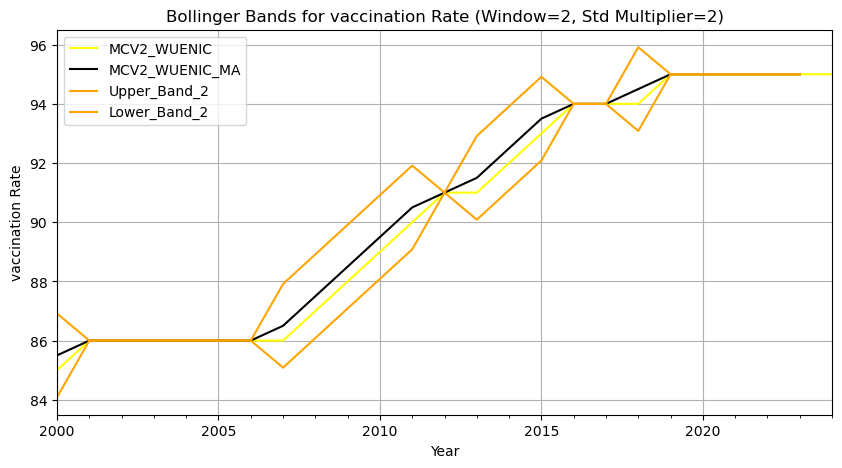

In [ ]:
# Bollinger Bands for vaccination
n_window = 2
std_multiplier = 2
cleaned_data['MCV2_WUENIC_MA'] = cleaned_data['MCV2_WUENIC'].rolling(window=n_window).mean()
cleaned_data['MCV2_WUENIC_STD'] = cleaned_data['MCV2_WUENIC'].rolling(window=n_window).std()
cleaned_data['Upper_Band_2'] = cleaned_data['MCV2_WUENIC_MA'] + (std_multiplier * cleaned_data['MCV2_WUENIC_STD'])
cleaned_data['Lower_Band_2'] = cleaned_data['MCV2_WUENIC_MA'] - (std_multiplier * cleaned_data['MCV2_WUENIC_STD'])
cleaned_data.set_index('Year')[['MCV2_WUENIC', 'MCV2_WUENIC_MA', 'Upper_Band_2', 'Lower_Band_2']].plot(figsize=(10, 5), color=['yellow', 'black', 'orange', 'orange'])
plt.title(f'Bollinger Bands for vaccination Rate (Window={n_window}, Std Multiplier={std_multiplier})')
plt.xlabel('Year')
plt.ylabel('vaccination Rate')
plt.grid(True)
plt.show()  

In [ ]:
cleaned_data['MCV2_WUENIC_STD'] = cleaned_data['MCV2_WUENIC'].rolling(window=n_window).std()
cleaned_data['Upper_Band_2'] = cleaned_data['MCV2_WUENIC_MA'] + (std_multiplier * cleaned_data['MCV2_WUENIC_STD'])
cleaned_data['Lower_Band_2'] = cleaned_data['MCV2_WUENIC_MA'] - (std_multiplier * cleaned_data['MCV2_WUENIC_STD'])
cleaned_data.set_index('Year')[['MCV2_WUENIC', 'MCV2_WUENIC_MA', 'Upper_Band_2', 'Lower_Band_2']].plot(figsize=(10, 5), color=['yellow', 'black', 'orange', 'orange'])
plt.title(f'Bollinger Bands for vaccination Rate (Window={n_window}, Std Multiplier={std_multiplier})')
plt.xlabel('Year')
plt.ylabel('vaccination Rate')
plt.grid(True)
plt.show()  

In [ ]:
cleaned_data['MCV2_WUENIC_STD'] = cleaned_data['MCV2_WUENIC'].rolling(window=n_window).std()
cleaned_data['Upper_Band_2'] = cleaned_data['MCV2_WUENIC_MA'] + (std_multiplier * cleaned_data['MCV2_WUENIC_STD'])
cleaned_data['Lower_Band_2'] = cleaned_data['MCV2_WUENIC_MA'] - (std_multiplier * cleaned_data['MCV2_WUENIC_STD'])
cleaned_data.set_index('Year')[['MCV2_WUENIC', 'MCV2_WUENIC_MA', 'Upper_Band_2', 'Lower_Band_2']].plot(figsize=(10, 5), color=['yellow', 'black', 'orange', 'orange'])
plt.title(f'Bollinger Bands for vaccination Rate (Window={n_window}, Std Multiplier={std_multiplier})')
plt.xlabel('Year')
plt.ylabel('vaccination Rate')
plt.grid(True)
plt.show()  